In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load train and test data sets

In [3]:
twit_train = pd.read_csv('train.csv', encoding = "ISO-8859-1")
twit_test = pd.read_csv('test.csv', encoding = "ISO-8859-1")

In [4]:
twit_test.head()

,ItemID,SentimentText
0,1,is so sad for my APL frie...
1,2,I missed the New Moon trail...
2,3,omg its already 7:30 :O
3,4,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,i think mi bf is cheating on me!!! ...


In [5]:
#create NaN column in test prior to combining

In [6]:
twit_test['Sentiment']=np.nan

In [7]:
#combine train and test data frames to facilitate easier cleaning of data 

In [8]:
combi_twit = pd.concat([twit_train,twit_test],ignore_index=True,sort=True)

In [9]:
#import nltk package stop words

In [10]:
import nltk

In [11]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
        C:\Users\CiaranCarroll\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [12]:
#create message lenght column

In [13]:
combi_twit['Text Length']=combi_twit['SentimentText'].apply(len)

In [14]:
#create hist of message length between sentiments to see if any trend

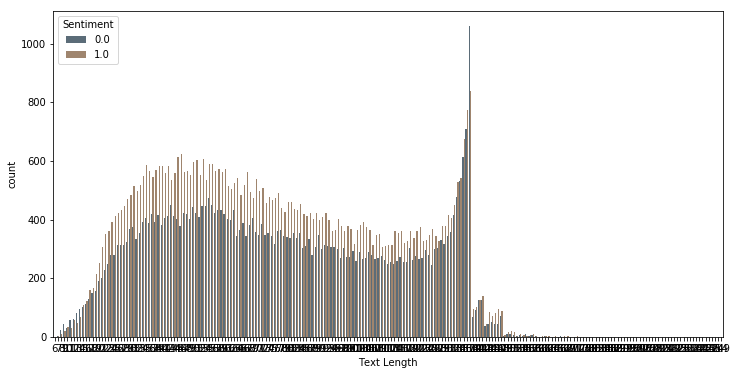

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x='Text Length',data=combi_twit,hue='Sentiment',saturation=0.2)

In [16]:
# similar distribution of text length, between negative and positive sentiments
# note message lengths greater than 140 characters

In [17]:
print(combi_twit[combi_twit['Text Length'] == combi_twit['Text Length'].max()]['SentimentText'])

8834       brokeback mountain was terrible.\n8838,0,Sent...
108823     brokeback mountain was terrible.\n8838,0,Sent...
Name: SentimentText, dtype: object


In [18]:
#import string and nltk stopwords to preprocess data

In [19]:
import string
from nltk.corpus import stopwords

In [20]:
#create hashtag extraction function

In [21]:
def hash_extract(message):
    return [word for word in message.split() if word[0] == '#']

In [22]:
#create text processing function to remove punctuation, hastags and stopwords (words which do not provide much insight)

In [29]:
def text_process(message):
    #1 Split message into list of words & remove Stop Words, hashtags, @mentions & http links
    no_punc = [word for word in message.split() if word.lower() not in stopwords.words('english') and word[0] != '#' and word[0] != '@' and word[0:4] != 'http']
    #2 rejoin split word list in space separated string
    no_punc = ' '.join(no_punc)
    #3 Parse string for punctuation marks
    no_punc = [char for char in no_punc if char not in string.punctuation]
    #4 Rejoin characters into text string and split to word tokens
    no_punc = ''.join(no_punc).split()
    return no_punc

In [ ]:
# apply hashtag extraction fucntion to dataframe

In [25]:
combi_twit['Hashtags']=combi_twit['SentimentText'].apply(hash_extract)

In [ ]:
#apply text processing function to data frame

In [27]:
combi_twit['SentimentTextProcessed']=combi_twit['SentimentText'].apply(text_process)

In [81]:
#split out training and test data sets

In [31]:
twit_test = combi_twit[pd.isnull(combi_twit['Sentiment'])]
twit_train = combi_twit[(combi_twit['Sentiment'] == 1) | (combi_twit['Sentiment'] == 0)]

In [32]:
#implement train test split on training data set to test models

In [33]:
X = twit_train['SentimentText']
y = twit_train['Sentiment']
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
X_train.head()

35593    @alekzalatte latte! Welcome to Twitter!!!!!!! ...
80494    @Chaoticshimmer if it was that Paul I would ha...
29243    @aciel Hihihi... udah nyoba UberTwitter belum?...
65904    @Bleakey Dude, it's so true. And the little as...
55213    @barbra77 work nights in a 5* private apartmen...
Name: SentimentText, dtype: object

In [36]:
# import count vectorizer for creating matrix of word tokens, tfidf, naive bayes model

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [38]:
#import pipeline

In [39]:
from sklearn.pipeline import Pipeline

In [40]:
pipeline = Pipeline([
    ('bag_of_words',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [41]:
#fit model to training set

In [42]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bag_of_words', CountVectorizer(analyzer=<function text_process at 0x000001B9CD92A048>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), pr...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [43]:
# create prediction object

In [44]:
predictions = pipeline.predict(X_test)

In [45]:
#import classification report and confusion matrix from sklearn

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
#Print confusion matrix and classification report to see results of model

In [48]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 7980  6490]
 [ 2481 16046]]


             precision    recall  f1-score   support

        0.0       0.76      0.55      0.64     14470
        1.0       0.71      0.87      0.78     18527

avg / total       0.73      0.73      0.72     32997



In [49]:
#try other models

In [50]:
from sklearn.svm import SVC

In [51]:
pipeline_SVC = Pipeline([
    ('bag_of_words',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [52]:
pipeline_SVC.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bag_of_words', CountVectorizer(analyzer=<function text_process at 0x000001B9CD92A048>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), pr...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [53]:
SVC_predictions = pipeline_SVC.predict(X_test)

In [63]:
print(confusion_matrix(y_test,SVC_predictions))
print('\n')
print(classification_report(y_test,SVC_predictions))

[[    0 14470]
 [    0 18527]]


             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00     14470
        1.0       0.56      1.00      0.72     18527

avg / total       0.32      0.56      0.40     32997



C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [64]:
#Test SVC without TfIdf

In [65]:
pipeline_SVC_no_TfIdf = Pipeline([
    ('bag_of_words',CountVectorizer(analyzer=text_process)),
    ('classifier',SVC())
])

In [66]:
pipeline_SVC_no_TfIdf.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bag_of_words', CountVectorizer(analyzer=<function text_process at 0x000001B9CD92A048>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), pr...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [67]:
SVC_no_TfIdf_predictions = pipeline_SVC_no_TfIdf.predict(X_test)

In [68]:
print(confusion_matrix(y_test,SVC_no_TfIdf_predictions))
print('\n')
print(classification_report(y_test,SVC_no_TfIdf_predictions))

[[    0 14470]
 [    0 18527]]


             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00     14470
        1.0       0.56      1.00      0.72     18527

avg / total       0.32      0.56      0.40     32997



C:\Users\CiaranCarroll\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
#create NB pipeline without tfidf for comparison

In [56]:
no_TfIdf_Pipeline_NB = Pipeline([
    ('bag_of_words',CountVectorizer()),
    ('classifier',MultinomialNB())
])

In [57]:
no_TfIdf_Pipeline_NB.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bag_of_words', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [58]:
no_TfIdf_NB_predictions = no_TfIdf_Pipeline_NB.predict(X_test)

In [59]:
print(confusion_matrix(y_test,no_TfIdf_NB_predictions))
print('\n')
print(classification_report(y_test,no_TfIdf_NB_predictions))

[[10305  4165]
 [ 3754 14773]]


             precision    recall  f1-score   support

        0.0       0.73      0.71      0.72     14470
        1.0       0.78      0.80      0.79     18527

avg / total       0.76      0.76      0.76     32997



In [60]:
#save model via joblib for use in other processes

In [61]:
from sklearn.externals import joblib
joblib.dump(no_TfIdf_Pipeline_NB,'NB_Model_twitter.pkl')

['NB_Model_twitter.pkl']

In [62]:
#No TfIdf return the best result on predicitng against split training data
